In [2]:
import pandas as pd
import numpy as np
import altair as alt
from IPython.display import HTML

alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
names2realnames = {
    'MOO':'       MOO',
    'MOAE':'    MOAE',
    'MOAG':'     MOAG',
    'RANDOM':'RANDOM',
    'MOEG':'      MOEG',
    'MOA':' MOA',
    'MOE':'  MOE',
    'MOG':'   MOG'
}

In [7]:
df = pd.read_csv('./Results/results.csv')
df.method = df.method.apply(lambda x: names2realnames[x])

methods = set(df.method.unique())
len_users = len(df.student.unique())

In [8]:
max_progression = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_progression.new_skill_student = max_progression.new_skill_student.apply(lambda x: x - 0.13)

In [10]:
df_max_step = df.groupby(['student','method']).step.max().reset_index()
df_time = df.groupby(['student','method']).time.mean().reset_index()

In [11]:
st = list(df_max_step.student.unique())[0]

for mt in methods - set(df_max_step.method.unique()):
    df_max_step.loc[len(df_max_step)] = [st, mt, 0]

In [12]:
st = list(df_time.student.unique())[0]

for mt in methods - set(df_time.method.unique()):
    df_time.loc[len(df_time)] = [st, mt, 0]

In [13]:
st = list(max_progression.student.unique())[0]

for mt in methods - set(max_progression.method.unique()):
    max_progression.loc[len(max_progression)] = [mt, st, 0]

In [14]:
alt.renderers.enable('svg')

HTML('''
<svg height="0" width="0" xmlns="http://www.w3.org/2000/svg" version="1.1">
    <defs>

        <!-- From SVG stripe generator 
        https://www.coffee-break-designs.com/labs/svg_stripe_generator/ -->
        
        <pattern id="pattern_1" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#4c78a8" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_2" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#f58518" stroke-width="4" />
        </pattern>

        <pattern id="pattern_6" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(0)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#eeca3b" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_4" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#72b7b2" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_5" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#54a24b" stroke-width="4" />
            <line x1="0" y="0" x2="5" y2="0" stroke="#54a24b" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_3" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="5" y2="0" stroke="#e45756" stroke-width="4" />
            <line x1="0" y="0" x2="0" y2="5" stroke="#e45756" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_7" patternUnits="userSpaceOnUse" width="10" height="10" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="10" stroke="#b279a2" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_8" patternUnits="userSpaceOnUse" width="10" height="10" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="10" stroke="#ff9da6" stroke-width="4" />
        </pattern>
        
    </defs>
</svg>
''')

In [15]:
wdth = 150
heit = 300
    
progression_chart = alt.Chart(max_progression).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('mean(new_skill_student)', scale=alt.Scale(domain=(0,1)),
              axis=alt.Axis(title="Progression",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('method:N',title='', #scale=pattern_scale, legend = None
                        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        #titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(d)'
    )

error_bars_progression = alt.Chart(max_progression).mark_errorbar(ticks=True).encode(
        x='method:N',
        y=alt.Y('new_skill_student',title='Progression'),
    )

In [16]:
wdth = 150
heit = 300
    
steps_chart = alt.Chart(df_max_step).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('mean(step)',
              axis=alt.Axis(title="Iterations",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('method:N',title='', #scale=pattern_scale, legend = None
                        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        #titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(b)'
    )

error_bars_steps = alt.Chart(df_max_step).mark_errorbar(ticks=True).encode(
        x='method:N',
        y=alt.Y('step',title='Iterations'),
    )

In [17]:
wdth = 150
heit = 300
    
time_chart = alt.Chart(df_time).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('mean(time)', scale=alt.Scale(domain=(0,12)),
              axis=alt.Axis(title="Time (sec)",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 6,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('method:N',title='', #scale=pattern_scale, legend = None
                        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        #titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(c)'
    )

In [18]:
max_skill = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_skill['Mastery'] = max_skill.new_skill_student.apply(lambda x: 1 if x > 0.98 else 0)
max_skill = max_skill.groupby('method').Mastery.sum().reset_index()

In [19]:
for mt in methods - set(max_skill.method.unique()):
    max_skill.loc[len(max_skill)] = [mt, 0]
    
max_skill.Mastery = max_skill.Mastery.apply(lambda x: x/len_users*100)

In [20]:
pattern_scale = ({
       'range': ['url(#pattern_1)', 'url(#pattern_2)', 'url(#pattern_3)',
                 'url(#pattern_4)','url(#pattern_5)','url(#pattern_6)','url(#pattern_7)','url(#pattern_8)']
    })

In [21]:
wdth = 150
heit = 300
    
mastery_chart = alt.Chart(max_skill).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26,
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('Mastery',
              axis=alt.Axis(title="Mastery (%)",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('method:N', title='', scale=pattern_scale, #legend = None
                        legend=alt.Legend(orient='bottom', titleFontSize=25, columns=4, labelFontSize=23, 
                        titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        labelFont='Time New Roman',symbolSize=500) 
                       )
        
        #fill = alt.Fill('method:N',title='',
                        #legend=alt.Legend(orient='bottom',columns=4,
                        #titleFontSize=25, labelFontSize=23, titleFontStyle='italic',
                        #labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
          #             legend=None
           #            )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(a)'
    )

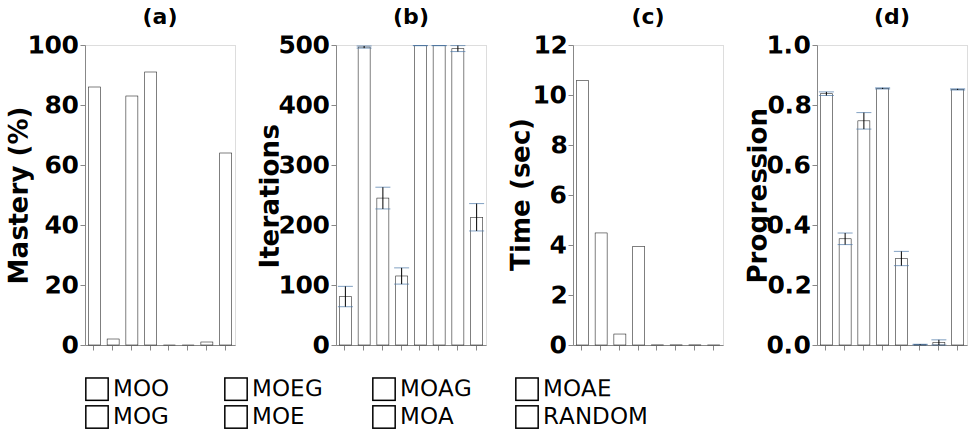

In [22]:
r = alt.hconcat(mastery_chart,steps_chart+error_bars_steps)
r = alt.hconcat(r,time_chart)
r = alt.hconcat(r,progression_chart+error_bars_progression)
r.configure_title(fontSize=22)

In [303]:
methods = ['       MOO', '    MOAE', '     MOAG', '      MOEG']

df_resultats_gp = pd.DataFrame(columns=['student','method','skill','gap','new_skill','step'])
cpt = 0

df = df[df.method.isin(methods)]

for idx, user in enumerate(list(df.student.unique())):
    if idx%20==0:
        print(idx)
    
    df_local_2 = df[df.student==user]
    
    for met in methods:
        df_local = df_local_2[df_local_2.method==met]
        
        seen_false = []
        
        for raw in df_local.itertuples():
            res_raw = [user, met, raw[3]]
            
            materials = eval(raw[4])
            correct = eval(raw[5])
            
            gap = []
            add_false = []
            
            for mat, c in zip(materials, correct):
                if c == 0:
                    add_false.append(mat)
                    
                incorrect_seen = [abs(prev_mat-mat) for prev_mat in seen_false]
                if len(incorrect_seen) == 0:
                    gap.append(0)
                else:
                    gap.append( sum(incorrect_seen)/len(incorrect_seen) )

            seen_false.extend(add_false)
            
            if len(seen_false) > 3:
                seen_false = seen_false[-3:]
            
            res_raw.extend([sum(gap)/len(gap), raw[6], raw[7]])
            df_resultats_gp.loc[cpt] = res_raw
            cpt += 1

0
20
40
60
80


In [304]:
for met in df_resultats_gp.method.unique():
    loc = df_resultats_gp[df_resultats_gp.method==met]
    maxi = loc.step.max()
    
    len_st = len(loc.student.unique())
    
    for idx, st in enumerate(loc.student.unique()):
        loc2 = loc[loc.student==st]
        maxi_2 = loc2.step.max()
        remain_step = maxi - maxi_2
        
        loc2 = loc2.tail(1)
        
        maxi_skill = loc2.skill.max()
        maxi_gap = loc2.gap.max()
        maxi_new_skill = loc2.new_skill.max()
        
        for step in range(maxi_2+1,maxi_2+1+remain_step):
            df_resultats_gp.loc[len(df_resultats_gp)] = [st, met, maxi_skill, 0, maxi_new_skill, step]

       MOO   0.0
       MOO   0.01
       MOO   0.02
       MOO   0.03
       MOO   0.04
       MOO   0.05
       MOO   0.06
       MOO   0.07
       MOO   0.08
       MOO   0.09
       MOO   0.1
       MOO   0.11
       MOO   0.12
       MOO   0.13
       MOO   0.14
       MOO   0.15
       MOO   0.16
       MOO   0.17
       MOO   0.18
       MOO   0.19
       MOO   0.2
       MOO   0.21
       MOO   0.22
       MOO   0.23
       MOO   0.24
       MOO   0.25
       MOO   0.26
       MOO   0.27
       MOO   0.28
       MOO   0.29
       MOO   0.3
       MOO   0.31
       MOO   0.32
       MOO   0.33
       MOO   0.34
       MOO   0.35
       MOO   0.36
       MOO   0.37
       MOO   0.38
       MOO   0.39
       MOO   0.4
       MOO   0.41
       MOO   0.42
       MOO   0.43
       MOO   0.44
       MOO   0.45
       MOO   0.46
       MOO   0.47
       MOO   0.48
       MOO   0.49
       MOO   0.5
       MOO   0.51
       MOO   0.52
       MOO   0.53
       MOO   0.54
       MOO   0.5

In [314]:
df_resultats_gp_2 = df_resultats_gp.groupby(['method','step']).gap.mean().reset_index()

df_resultats_gp_2 = df_resultats_gp_2.groupby(['method'])['gap'].rolling(2)\
.mean().reset_index().drop(columns=['level_1'])

steps = []

for met in df_resultats_gp_2.method.unique():
    steps += list(range(1,1+len(df_resultats_gp_2[df_resultats_gp_2.method == met])))
    
df_resultats_gp_2['step'] = steps

In [320]:
wdth = 600
heit = 300
    
gap_evol_chart_2 = alt.Chart(df_resultats_gp_2).mark_line(interpolate='basis',strokeWidth=2.5).encode(
        alt.X('step',axis=alt.Axis(title="Iterations", titleFontSize=26, tickCount=10, 
                                   labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('gap',
              axis=alt.Axis(title="Gap",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            grid=False,labelAngle=0)
             ),
        
        color=alt.Color('method:N',title=''),    
        
        strokeDash=alt.StrokeDash('method:N',title='',
                        scale=alt.Scale( range=[ [8,4],[8,2],[4,2],[] ] ),
                        legend=None
                       #legend=alt.Legend(orient='bottom',columns=4,
                        #titleFontSize=25, labelFontSize=23, titleFontStyle='italic',
                        #labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=2000, symbolStrokeWidth=5) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
    )


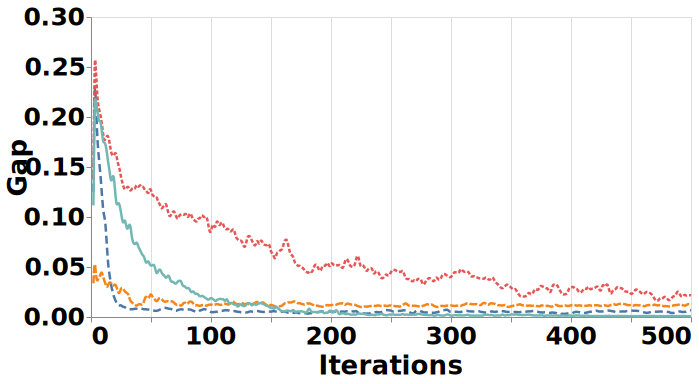

In [321]:
gap_evol_chart_2

In [322]:
df_resultats_gp_2 = df_resultats_gp.groupby(['method','step']).new_skill.mean().reset_index()

df_resultats_gp_2 = df_resultats_gp_2.groupby(['method'])['new_skill'].rolling(2)\
.mean().reset_index().drop(columns=['level_1'])

steps = []

for met in df_resultats_gp_2.method.unique():
    steps += list(range(1,1+len(df_resultats_gp_2[df_resultats_gp_2.method == met])))
    
df_resultats_gp_2['step'] = steps

In [325]:
wdth = 600
heit = 300
    
gap_evol_chart_2 = alt.Chart(df_resultats_gp_2).mark_line(interpolate='basis',strokeWidth=2.5).encode(
        alt.X('step',axis=alt.Axis(title="Iterations", titleFontSize=26, tickCount=10, 
                                   labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('new_skill',
              axis=alt.Axis(title="Skill Value",
                           labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            grid=False,labelAngle=0)
             ),
        
        color=alt.Color('method:N',title=''),    
        
        strokeDash=alt.StrokeDash('method:N',title='',
                        scale=alt.Scale( range=[ [8,4],[8,2],[4,2],[] ] ),
                        #legend=None,
                       legend=alt.Legend(orient='bottom',columns=4,
                       titleFontSize=25, labelFontSize=23, titleFontStyle='italic',
                        labelFontStyle='bold',titleFont = 'Time New Roman',
                        labelFont='Time New Roman',symbolSize=2000, symbolStrokeWidth=5) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
    )


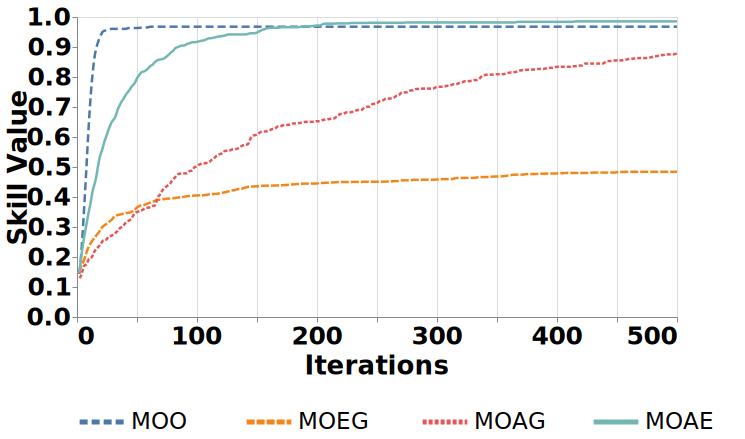

In [326]:
gap_evol_chart_2